In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
import Model
import warnings

warnings.simplefilter('ignore', FutureWarning)

if __name__ == "__main__":
	t0 = time.time()
	featureList = ['EPS Growth', 'Volatility 180 D', 'Trailing EPS', 'Price to Cash Flow', 'EPS', 'Volume', 'Return on Assets', 'Price to Book', 'Dividend Yield', 'Total Debt to Total Equity', 'Return on Invested Capital', 'Return on Common Equity']
	train, validate, test = Model.splitData(200,3,12)
	randForest = Model.buildWithIndexesTripleClass(modelType = Model.randomForestClassifier, indexes = train, target= 'Rate of Return', features = featureList, featureLength = 12,\
									targetLength = 3, sector = "Financials", percentileTarget = 90, percentileAvoid = 10, verbose = True)
	print("Labels: ")
	print(randForest.classes_)
	print("Importances: ")
	print(randForest.feature_importances_)

[ -57  -24  -51  -30  -84 -201 -171 -150 -198  -66 -114 -129  -72 -147 -177
 -123  -21 -162  -69 -117  -96  -36  -78 -141 -195 -111 -105 -189 -135 -138
  -27 -186  -18  -45  -63  -99 -102]
[-120 -192 -174  -81 -183 -132 -153  -33  -60 -180 -165 -168]
[ -90 -108 -156 -126  -87  -93  -39  -75  -54 -144  -48  -42 -159]
Index: -57
0.0 percent complete with preparing data.
Index: -24
2.7027027027027026 percent complete with preparing data.
Index: -51
5.405405405405405 percent complete with preparing data.
Index: -30
8.108108108108109 percent complete with preparing data.
Index: -84
10.81081081081081 percent complete with preparing data.
Index: -201
13.513513513513514 percent complete with preparing data.
Index: -171
16.216216216216218 percent complete with preparing data.
Index: -150
18.91891891891892 percent complete with preparing data.
Index: -198
21.62162162162162 percent complete with preparing data.
Index: -66
24.324324324324326 percent complete with preparing data.
Index: -114
27.027

In [20]:
precisions = {'seen':{}, 'above10':{}, 'above75':{}, 'above50':{}, 'above25':{}, 'above90':{}}
betterThan = {}
for prob in range(0,100,5):
	precisions['seen'][prob] = 0
	precisions['above10'][prob] = 0
	precisions['above75'][prob] = 0
	precisions['above50'][prob] = 0
	precisions['above25'][prob] = 0
	precisions['above90'][prob] = 0
for i in validate:
	addedStocks, probabilities = Model.predict_probabilities(randForest, startIndex = i, endIndex = i+11, features = featureList, sector = "Financials")
	actual = []
	for prob in range(0,100,5):
		betterThan[prob] = []
	for stock in addedStocks:
		actual.append(Model.rateOfReturn(Model.retrieveData(stock, 'Last Price', i+12, i+14, [])))
	for i in range(len(probabilities)):
		for prob in range(0,100,5):
			if probabilities[i][1] > prob / 100:
				betterThan[prob].append(1)
			else:
				betterThan[prob].append(0)
	for prob in range(0,100,5):
		if sum(betterThan[prob]) > 0:
			precisions['above10'][prob] = (Model.precision(Model.getPercentile(actual, 10),betterThan[prob]) * len(betterThan[prob]) + precisions['above10'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above75'][prob] = (Model.precision(Model.getPercentile(actual, 75),betterThan[prob]) * len(betterThan[prob]) + precisions['above75'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above50'][prob] = (Model.precision(Model.getPercentile(actual, 50), betterThan[prob]) * len(betterThan[prob]) + precisions['above50'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above25'][prob] = (Model.precision(Model.getPercentile(actual, 25), betterThan[prob]) * len(betterThan[prob]) + precisions['above25'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above90'][prob] = (Model.precision(Model.getPercentile(actual, 90), betterThan[prob]) * len(betterThan[prob]) + precisions['above90'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['seen'][prob] = precisions['seen'][prob] + len(betterThan[prob])
x = []
y90 = []
y75 = []
y50 = []
y25 = []
y10 = []
counts = []
for prob in range(0,100,5):
	print(str(prob) + " above 90th percentile: " + str(precisions['above90'][prob]))
	print(str(prob) + " above 75th percentile: " + str(precisions['above75'][prob]))
	print(str(prob) + " above 50th percentile: " + str(precisions['above50'][prob]))
	print(str(prob) + " above 25th percentile: " + str(precisions['above25'][prob]))
	print(str(prob) + " above 10th percentile: " + str(precisions['above10'][prob]))
	counts.append(sum(betterThan[prob]))
	if (precisions['above10'][prob]) > 0:
		y90.append(precisions['above90'][prob])
		y75.append(precisions['above75'][prob])
		y50.append(precisions['above50'][prob])
		y25.append(precisions['above25'][prob])
		y10.append(precisions['above10'][prob])
		x.append(prob)

print(time.time() - t0, "seconds wait time")

0 above 90th percentile: 0.100045065345
0 above 75th percentile: 0.248084722848
0 above 50th percentile: 0.494817485354
0 above 25th percentile: 0.742226228031
0 above 10th percentile: 0.890491212258
5 above 90th percentile: 0.108369636358
5 above 75th percentile: 0.257413226625
5 above 50th percentile: 0.500565899673
5 above 25th percentile: 0.740069839639
5 above 10th percentile: 0.885887881085
10 above 90th percentile: 0.137487197866
10 above 75th percentile: 0.292987652532
10 above 50th percentile: 0.519372117891
10 above 25th percentile: 0.741336015843
10 above 10th percentile: 0.882252439424
15 above 90th percentile: 0.166165964205
15 above 75th percentile: 0.330937021523
15 above 50th percentile: 0.542349955736
15 above 25th percentile: 0.752406653897
15 above 10th percentile: 0.873636283622
20 above 90th percentile: 0.192562704733
20 above 75th percentile: 0.363448624559
20 above 50th percentile: 0.559810173003
20 above 25th percentile: 0.760347539763
20 above 10th percentile: 

Counts: 
[350, 307, 195, 139, 100, 71, 56, 43, 37, 32, 27, 24, 20, 15, 8, 6, 3, 2, 1, 0]


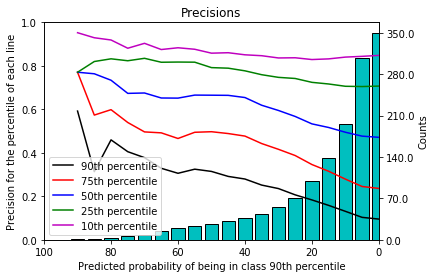

In [21]:
print("Counts: ")
print(counts)
fig = plt.figure()
axes = plt.gca()
axes.set_xlim([0,100])
axes.set_xlim([0,100])
plt.title("Precisions")
plt.xlabel('Predicted probability of being in class 90th percentile')
plt.ylabel('Precision for the percentile of each line')
axes.invert_xaxis()
bar = axes.twinx()
rects = bar.bar(x = list(range(0,100,5)), height = list(map(lambda x: x/max(counts),counts)), width = 4, color = 'c', linestyle = 'solid', edgecolor = 'k', zorder = -1)
bar.set_yticklabels(list(map(lambda x: x * max(counts) / 5, range(0,6,1))))
bar.set_ylabel('Counts', color = 'k')
plt.plot(x, y90, color = 'k', label = "90th percentile")
plt.plot(x, y75, color = 'r', label = "75th percentile")
plt.plot(x, y50, color = 'b', label = "50th percentile")
plt.plot(x, y25, color = 'g', label = "25th percentile")
plt.plot(x, y10, color = 'm', label = "10th percentile")
plt.legend()

In [22]:
fig.savefig(str(time.time()) + 'test.jpg')
plt.show()

Feature ranking:
1. Volatility 180 D (0.098565)
2. EPS Growth (0.091073)
3. Price to Book (0.088543)
4. Volume (0.088519)
5. Price to Cash Flow (0.088186)
6. Return on Invested Capital (0.086185)
7. Total Debt to Total Equity (0.084329)
8. Return on Common Equity (0.083159)
9. Trailing EPS (0.076432)
10. EPS (0.075912)
11. Return on Assets (0.069651)
12. Dividend Yield (0.069445)


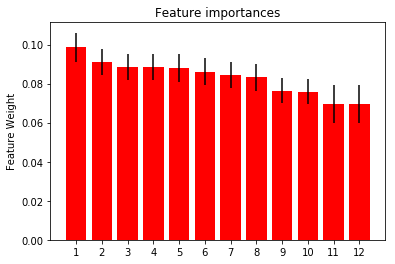

In [23]:
# adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = randForest.feature_importances_
std = np.std([est.feature_importances_ for est in randForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(featureList)):
    print("%d. %s (%f)" % (f + 1, featureList[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(featureList)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(len(featureList)), range(1,len(featureList)+1))
plt.xlim([-1, len(featureList)])
plt.ylabel('Feature Weight')
plt.show()